In [3]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
leads= pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Inspecting the dataset

In [5]:
#checking total rows and cols in dataset
leads.shape

(9240, 37)

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#checking type of each column
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data Cleaning and Preparation

#### Checking data in categorical columns

In [8]:
# Defining a function to replace 'Select' with Nan
def Select(x):
    leads[x]=leads[x].replace('Select',np.nan)

In [9]:
#Checking for 'Select' in the data and replacing with np.nan
for vari in leads.columns:
    Select(vari)

In [10]:
#Checking % of null values
100*leads.isnull().sum()/len(leads)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [11]:
# Dropping columns with high Null values
leads.drop(columns=['How did you hear about X Education','Lead Profile','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Tags','City'],axis=1,inplace=True)

In [12]:
#Function to drop highly skewed columns

def skewed(x):
    if (100*leads[x].value_counts()[0]/9240)>80.00:
        leads.drop(columns=[x],axis=1,inplace=True)

In [17]:
# Cat_cols contains only the categorical columns
Cat_colu=['Prospect ID','Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','Country','Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content','Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

In [18]:
#Dropping Skewed columns
for var in Cat_colu:
    skewed(var)

In [17]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [18]:
#Checking % of null values
100*leads.isnull().sum()/len(leads)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
A free copy of Mastering The Interview            0.000000
Last Notable Activity                             0.000000
dtype: float64

### Checking remaining columns for skewed

In [19]:
# Checking % of each values
100*leads['Country'].value_counts()/len(leads)

India                   70.259740
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Nigeria                  0.043290
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Germany                  0.043290
Sweden                   0.032468
Asia/Pacific Region      0.021645
Bangladesh               0.021645
Belgium                  0.021645
Philippines              0.021645
Ghana                    0.021645
Netherlands              0.021645
China                    0.021645
Italy                    0.021645
Uganda                   0.021645
Indonesia                0.010823
Malaysia      

In [20]:
#As majority of data is for 'India' so it is highly skewed columns ,hence deleting it
leads.drop(columns=['Country'],axis=1,inplace=True)

In [21]:
#checking for skewed
100*leads['Specialization'].value_counts()/len(leads)

Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [22]:
#checking skewed
100*leads['What is your current occupation'].value_counts()/len(leads)

Unemployed              60.606061
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [23]:
#checking skewed
100*leads['What matters most to you in choosing a course'].value_counts()/len(leads)

Better Career Prospects      70.649351
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [24]:
#dropping 'What matters most to you in choosing a course' as it is skewed
leads.drop(columns=['What matters most to you in choosing a course'],axis=1,inplace=True)

In [25]:
leads.shape

(9240, 13)

In [26]:
#Keep rows with atleast 10 not null fields
leads=leads.dropna(thresh=10)

In [27]:
#Checking % of null values
100*leads.isnull().sum()/len(leads)

Prospect ID                                0.000000
Lead Number                                0.000000
Lead Origin                                0.000000
Lead Source                                0.326975
Converted                                  0.000000
TotalVisits                                0.784741
Total Time Spent on Website                0.000000
Page Views Per Visit                       0.784741
Last Activity                              0.534060
Specialization                            36.130790
What is your current occupation           29.242507
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

### Imputing Null values

In [28]:
#Imputing Null values in Specialization
100*leads['Specialization'].value_counts()/len(leads)

Finance Management                   10.637602
Human Resource Management             9.242507
Marketing Management                  9.133515
Operations Management                 5.482289
Business Administration               4.392371
IT Projects Management                3.989101
Supply Chain Management               3.803815
Banking, Investment And Insurance     3.683924
Travel and Tourism                    2.212534
Media and Advertising                 2.212534
International Business                1.940054
Healthcare Management                 1.732970
Hospitality Management                1.242507
E-COMMERCE                            1.220708
Retail Management                     1.089918
Rural and Agribusiness                0.795640
E-Business                            0.621253
Services Excellence                   0.435967
Name: Specialization, dtype: float64

In [29]:
#Imputing Null values with Mode

leads['Specialization'].fillna('Finance Management',inplace=True)

In [30]:
#dropping column
leads.drop(columns=['What is your current occupation'],axis=1,inplace=True)

In [31]:
#Checking % of null values
100*leads.isnull().sum()/len(leads)

Prospect ID                               0.000000
Lead Number                               0.000000
Lead Origin                               0.000000
Lead Source                               0.326975
Converted                                 0.000000
TotalVisits                               0.784741
Total Time Spent on Website               0.000000
Page Views Per Visit                      0.784741
Last Activity                             0.534060
Specialization                            0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [32]:
leads.dropna(subset=['Lead Source','TotalVisits','Page Views Per Visit','Last Activity'],inplace=True)

### EDA

In [33]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Number                             9074 non-null   int64  
 2   Lead Origin                             9074 non-null   object 
 3   Lead Source                             9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Specialization                          9074 non-null   object 
 10  A free copy of Mastering The Interview  9074 non-null   obje

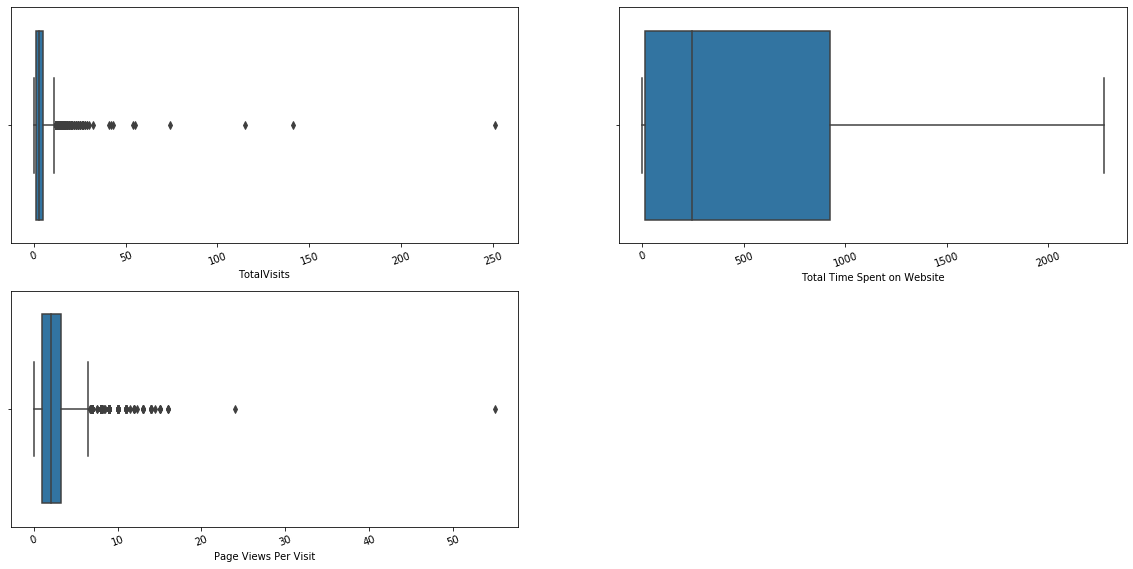

In [34]:
#Checking for Outliers
plt.figure(figsize=(20,20))
vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for i in enumerate(vars): 
    ax = plt.subplot(4, 2, i[0]+1)
    sns.boxplot(x=i[1], data=leads)
    plt.xticks(rotation = 20)

In [35]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
90%,650276.800000,1.000000,7.000000,1373.000000,5.000000
95%,655344.450000,1.000000,10.000000,1557.000000,6.000000
99%,659563.350000,1.000000,17.000000,1839.000000,9.000000


In [36]:
#Binning the TotalVisits columns
leads['TotalVisits_Bin']=pd.cut(leads['TotalVisits'], bins=[0,6,12,18,500], labels=['0-6','6-12','12-18','18+'])

In [37]:
#Checking counts of new TotalVisits_Bin column
leads['TotalVisits_Bin'].value_counts()

0-6      5749
6-12      942
12-18     154
18+        68
Name: TotalVisits_Bin, dtype: int64

In [38]:
#Dropping the original TotalVisits column
leads.drop(columns=['TotalVisits'],axis=1,inplace=True)

In [39]:
#treating outliers for 'Page Views Per Visit' column
Q1 = leads['Page Views Per Visit'].quantile(0.01)
Q4 = leads['Page Views Per Visit'].quantile(0.99)
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= Q1]=Q1
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >Q4]=Q4

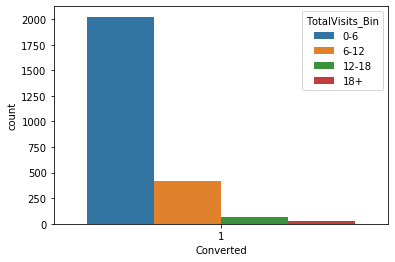

In [40]:
#Bivariate Analysis
band = leads.loc[leads.Converted == 1]
plot = sns.countplot(x="Converted", data=band, hue= "TotalVisits_Bin")
plt.show()

#### Above graph shows that leads with TotalVisits between 0-6 are mostly converted

(2.6, -0.4)

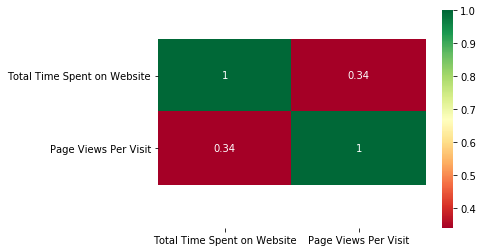

In [41]:
#Checking the correlation values of all numerical variables with respect to converted variable
corr_matrix2=leads[['Total Time Spent on Website','Page Views Per Visit']].corr()
cor=sns.heatmap(corr_matrix2,annot=True,cmap="RdYlGn")
#below code is used to fit the heatmap on the screen
bottom, top = cor.get_ylim()
cor.set_ylim(bottom + 0.6, top - 0.4)

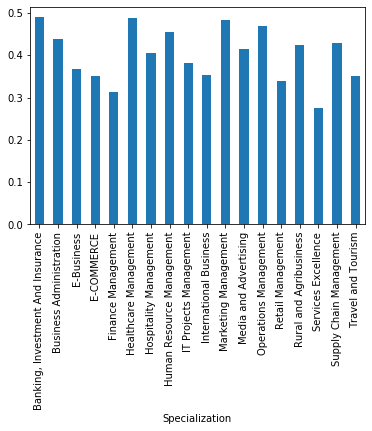

In [42]:
leads.groupby(["Specialization"])["Converted"].mean().plot.bar()
plt.show()

#### Banking investment and insurance,Health Care,Marketing,operations are the top 4 specialization that are most likely to get converted

### Dummy variables creation for categorical columns

In [43]:
# Creating dummy variables for the variable 'Lead Origin'
LeadOr=pd.get_dummies(leads['Lead Origin'],prefix='LeadOrigin')
# Dropping LeadOrigin_Quick Add Form column
LeadOr1 = LeadOr.drop(['LeadOrigin_Lead Import'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,LeadOr1], axis=1)


In [44]:
# Replacing  all 'google' values with 'Google' value in the Lead Source Column
leads['Lead Source']=leads['Lead Source'].replace('google','Google')

In [45]:
# Checking and assigning the values of column 'Lead Source' as 'Others' whose value count is leass than 10.
a = leads['Lead Source'].value_counts()
m = leads['Lead Source'].isin(a.index[a<10])
leads.loc[m, 'Lead Source'] = 'Others'

In [46]:
# Creating dummy variables for the variable 'Lead Source'
LeadSo=pd.get_dummies(leads['Lead Source'],prefix='LeadSource')
# Dropping LeadSource_Others column
LeadSo1 = LeadSo.drop(['LeadSource_Others'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,LeadSo1], axis=1)


In [47]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Prospect ID                             9074 non-null   object  
 1   Lead Number                             9074 non-null   int64   
 2   Lead Origin                             9074 non-null   object  
 3   Lead Source                             9074 non-null   object  
 4   Converted                               9074 non-null   int64   
 5   Total Time Spent on Website             9074 non-null   int64   
 6   Page Views Per Visit                    9074 non-null   float64 
 7   Last Activity                           9074 non-null   object  
 8   Specialization                          9074 non-null   object  
 9   A free copy of Mastering The Interview  9074 non-null   object  
 10  Last Notable Activity                   9074 non

In [48]:
# Creating dummy variables for the variable 'Last Activity'
LastAcc=pd.get_dummies(leads['Last Activity'],prefix='LastActivity')
# Dropping LeadSource_Others column
LastAcc1 = LastAcc.drop(['LastActivity_Visited Booth in Tradeshow'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,LastAcc1], axis=1)


In [49]:
# Creating a dummy variable for 'Specialization' and dropping the first one.
Spe1=pd.get_dummies(leads['Specialization'],drop_first=True,prefix='Specialization')
leads = pd.concat([leads,Spe1], axis=1)

In [50]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the lead dataframe
leads[varlist] = leads[varlist].apply(binary_map)

In [51]:
# Creating a dummy variable for 'Last Notable Activity' and dropping the first one.
A1=pd.get_dummies(leads['Last Notable Activity'],drop_first=True,prefix='LNA')
leads = pd.concat([leads,A1], axis=1)

In [52]:
# Creating a dummy variable for 'TotalVisits_Bin' and dropping the first one.
A2=pd.get_dummies(leads['TotalVisits_Bin'],drop_first=True,prefix='TV')
leads = pd.concat([leads,A2], axis=1)

In [53]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,...,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_Resubscribed to emails,LNA_SMS Sent,LNA_Unreachable,LNA_Unsubscribed,LNA_View in browser link Clicked,TV_6-12,TV_12-18,TV_18+
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,Page Visited on Website,Finance Management,0,...,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,674,2.5,Email Opened,Finance Management,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,1532,2.0,Email Opened,Business Administration,1,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,305,1.0,Unreachable,Media and Advertising,0,...,0,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,1428,1.0,Converted to Lead,Finance Management,0,...,0,0,0,0,0,0,0,0,0,0


### Dropping the repeated variables

In [54]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Lead Origin','Lead Source','Last Activity','Specialization',
                  'Last Notable Activity', 'TotalVisits_Bin'], 1)

In [55]:
leads.shape

(9074, 68)

In [56]:
leads.head()

,Prospect ID,Lead Number,Converted,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Direct Traffic,...,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_Resubscribed to emails,LNA_SMS Sent,LNA_Unreachable,LNA_Unsubscribed,LNA_View in browser link Clicked,TV_6-12,TV_12-18,TV_18+
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,674,2.5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,1532,2.0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,305,1.0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,1428,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Train-Test Split

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
# Putting feature variable to X
X = leads.drop(['Prospect ID','Lead Number','Converted'], axis=1)

X.head()

,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,...,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_Resubscribed to emails,LNA_SMS Sent,LNA_Unreachable,LNA_Unsubscribed,LNA_View in browser link Clicked,TV_6-12,TV_12-18,TV_18+
0,0,0.0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,674,2.5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1532,2.0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,305,1.0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1428,1.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [60]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling


In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,...,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_Resubscribed to emails,LNA_SMS Sent,LNA_Unreachable,LNA_Unsubscribed,LNA_View in browser link Clicked,TV_6-12,TV_12-18,TV_18+
3009,-0.160255,-0.177298,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,-0.540048,-0.177298,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,-0.888650,-1.183128,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4750,1.643304,-0.177298,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7987,2.017593,0.074159,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Building

In [63]:
#  Importing RFE and LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [64]:
# Running RFE with the output number of the variable equal to 15
lm = LogisticRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [65]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 30),
 ('A free copy of Mastering The Interview', False, 43),
 ('LeadOrigin_API', True, 1),
 ('LeadOrigin_Landing Page Submission', True, 1),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadSource_Direct Traffic', False, 17),
 ('LeadSource_Facebook', False, 44),
 ('LeadSource_Google', False, 24),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 18),
 ('LeadSource_Reference', True, 1),
 ('LeadSource_Referral Sites', False, 19),
 ('LeadSource_Welingak Website', True, 1),
 ('LastActivity_Approached upfront', True, 1),
 ('LastActivity_Converted to Lead', False, 13),
 ('LastActivity_Email Bounced', True, 1),
 ('LastActivity_Email Link Clicked', False, 42),
 ('LastActivity_Email Marked Spam', False, 36),
 ('LastActivity_Email Opened', False, 8),
 ('LastActivity_Email Received', False, 2),
 ('LastActivity_Form Submitted on Website', False, 35),
 ('LastActivity_Had a Phone Conversation', True, 1

In [66]:
colu = X_train.columns[rfe.support_]

In [67]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'A free copy of Mastering The Interview',
       'LeadSource_Direct Traffic', 'LeadSource_Facebook', 'LeadSource_Google',
       'LeadSource_Organic Search', 'LeadSource_Referral Sites',
       'LastActivity_Converted to Lead', 'LastActivity_Email Link Clicked',
       'LastActivity_Email Marked Spam', 'LastActivity_Email Opened',
       'LastActivity_Email Received', 'LastActivity_Form Submitted on Website',
       'LastActivity_Page Visited on Website',
       'LastActivity_Resubscribed to emails', 'LastActivity_Unreachable',
       'LastActivity_Unsubscribed',
       'LastActivity_View in browser link Clicked',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
  

# Assessing the model with StatsModels

In [68]:
import statsmodels.api as sm

In [69]:
X_train_sm = sm.add_constant(X_train[colu])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2834.7
Date:                Mon, 26 Oct 2020   Deviance:                       5669.4
Time:                        20:38:05   Pearson chi2:                 6.59e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.5140      0.431      1.192      0.233      -0.331       1.359
Total Time Spent on Website               1.1473      0.039     29.394      0.000       1.071       1.224
LeadOrigin_API                           -1.3645      0.438     -3.113      0.002      -2.224      -0.505
LeadOrigin_Landing Page Submission       -1.6424      0.435     -3.777      0.000      -2.495      -0.790
LeadOrigin_Lead Add Form                  0.5980      1.039      0.576      0.565      -1.439       2.635
LeadSource_Olark Chat                     1.0147      0.116      8.736      0.000       0.787       1.242
LeadSource_Reference                      2.1108      0.970      2.175      0.030       0.209       4.012
LeadSource_Welingak Website               3.5101      1.190      2.949      0.003       1.177       5.843
LastActivity_Approached upfront          22.3874   1.15e+04      0.002      0.998   -2.25e+04    2.25e+04
LastActivity_Email Bounced               -1.8397      0.372     -4.950      0.000      -2.568      -1.111
LastActivity_Had a Phone Conversation     1.7975      1.055      1.704      0.088      -0.270       3.865
LastActivity_Olark Chat Conversation     -1.0767      0.164     -6.560      0.000      -1.398      -0.755
LastActivity_SMS Sent                     1.1870      0.071     16.671      0.000       1.047       1.327
LNA_Had a Phone Conversation              1.5553      1.513      1.028      0.304      -1.411       4.522
LNA_Modified                             -0.9215      0.078    -11.842      0.000      -1.074      -0.769
LNA_Unreachable                           1.6079      0.453      3.552      0.000       0.721       2.495
=========================================================================================================
"""

In [70]:
#### Dropping Columns with insignificant p-value
colu = colu.drop('LastActivity_Approached upfront', 1)
colu

Index(['Total Time Spent on Website', 'LeadOrigin_API',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Reference',
       'LeadSource_Welingak Website', 'LastActivity_Email Bounced',
       'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'LNA_Had a Phone Conversation', 'LNA_Modified', 'LNA_Unreachable'],
      dtype='object')

In [71]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[colu].columns
vif['VIF'] = [variance_inflation_factor(X_train[colu].values, i) for i in range(X_train[colu].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,LeadOrigin_Lead Add Form,62.42
5,LeadSource_Reference,47.97
6,LeadSource_Welingak Website,15.47
8,LastActivity_Had a Phone Conversation,3.41
11,LNA_Had a Phone Conversation,3.41
1,LeadOrigin_API,2.53
4,LeadSource_Olark Chat,2.32
12,LNA_Modified,1.89
2,LeadOrigin_Landing Page Submission,1.77
10,LastActivity_SMS Sent,1.63


In [73]:
# Dropping Columns with insignificant p-value
colu = colu.drop('LeadOrigin_Lead Add Form', 1)
colu

Index(['Total Time Spent on Website', 'LeadOrigin_API',
       'LeadOrigin_Landing Page Submission', 'LeadSource_Olark Chat',
       'LeadSource_Reference', 'LeadSource_Welingak Website',
       'LastActivity_Email Bounced', 'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'LNA_Had a Phone Conversation', 'LNA_Modified', 'LNA_Unreachable'],
      dtype='object')

In [74]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[colu].columns
vif['VIF'] = [variance_inflation_factor(X_train[colu].values, i) for i in range(X_train[colu].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,LastActivity_Had a Phone Conversation,3.41
10,LNA_Had a Phone Conversation,3.41
1,LeadOrigin_API,2.52
3,LeadSource_Olark Chat,2.32
11,LNA_Modified,1.88
2,LeadOrigin_Landing Page Submission,1.77
9,LastActivity_SMS Sent,1.63
8,LastActivity_Olark Chat Conversation,1.60
0,Total Time Spent on Website,1.29
4,LeadSource_Reference,1.14


In [75]:
#Reruning the model-3
X_train_sm = sm.add_constant(X_train[colu])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2840.6
Date:                Mon, 26 Oct 2020   Deviance:                       5681.2
Time:                        20:38:05   Pearson chi2:                 6.60e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.6197      0.385      1.609      0.108      -0.135       1.375
Total Time Spent on Website               1.1494      0.039     29.475      0.000       1.073       1.226
LeadOrigin_API                           -1.4732      0.392     -3.753      0.000      -2.242      -0.704
LeadOrigin_Landing Page Submission       -1.7475      0.389     -4.492      0.000      -2.510      -0.985
LeadSource_Olark Chat                     1.0308      0.116      8.890      0.000       0.804       1.258
LeadSource_Reference                      2.6014      0.439      5.923      0.000       1.741       3.462
LeadSource_Welingak Website               4.0027      0.818      4.896      0.000       2.400       5.605
LastActivity_Email Bounced               -1.8501      0.372     -4.980      0.000      -2.578      -1.122
LastActivity_Had a Phone Conversation     1.7860      1.055      1.693      0.091      -0.282       3.854
LastActivity_Olark Chat Conversation     -1.0923      0.164     -6.660      0.000      -1.414      -0.771
LastActivity_SMS Sent                     1.1826      0.071     16.624      0.000       1.043       1.322
LNA_Had a Phone Conversation              1.5677      1.514      1.036      0.300      -1.399       4.535
LNA_Modified                             -0.9090      0.078    -11.715      0.000      -1.061      -0.757
LNA_Unreachable                           1.6077      0.453      3.551      0.000       0.720       2.495
=========================================================================================================
"""

In [76]:
# Dropping Columns
colu = colu.drop('LastActivity_Had a Phone Conversation', 1)
colu

Index(['Total Time Spent on Website', 'LeadOrigin_API',
       'LeadOrigin_Landing Page Submission', 'LeadSource_Olark Chat',
       'LeadSource_Reference', 'LeadSource_Welingak Website',
       'LastActivity_Email Bounced', 'LastActivity_Olark Chat Conversation',
       'LastActivity_SMS Sent', 'LNA_Had a Phone Conversation', 'LNA_Modified',
       'LNA_Unreachable'],
      dtype='object')

In [77]:
#Reruning the model-4
X_train_sm = sm.add_constant(X_train[colu])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2842.0
Date:                Mon, 26 Oct 2020   Deviance:                       5684.0
Time:                        20:38:05   Pearson chi2:                 6.60e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.6192      0.385      1.608      0.108      -0.136       1.374
Total Time Spent on Website              1.1496      0.039     29.492      0.000       1.073       1.226
LeadOrigin_API                          -1.4685      0.392     -3.742      0.000      -2.238      -0.699
LeadOrigin_Landing Page Submission      -1.7465      0.389     -4.490      0.000      -2.509      -0.984
LeadSource_Olark Chat                    1.0270      0.116      8.863      0.000       0.800       1.254
LeadSource_Reference                     2.6004      0.439      5.922      0.000       1.740       3.461
LeadSource_Welingak Website              4.0026      0.818      4.896      0.000       2.400       5.605
LastActivity_Email Bounced              -1.8550      0.371     -4.994      0.000      -2.583      -1.127
LastActivity_Olark Chat Conversation    -1.0980      0.164     -6.698      0.000      -1.419      -0.777
LastActivity_SMS Sent                    1.1802      0.071     16.597      0.000       1.041       1.320
LNA_Had a Phone Conversation             3.3524      1.087      3.085      0.002       1.223       5.482
LNA_Modified                            -0.9023      0.077    -11.653      0.000      -1.054      -0.751
LNA_Unreachable                          1.6063      0.453      3.548      0.000       0.719       2.494
========================================================================================================
"""

In [80]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[colu].columns
vif['VIF'] = [variance_inflation_factor(X_train[colu].values, i) for i in range(X_train[colu].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,LeadOrigin_API,2.52
3,LeadSource_Olark Chat,2.32
10,LNA_Modified,1.88
2,LeadOrigin_Landing Page Submission,1.77
8,LastActivity_SMS Sent,1.63
7,LastActivity_Olark Chat Conversation,1.60
0,Total Time Spent on Website,1.29
4,LeadSource_Reference,1.14
6,LastActivity_Email Bounced,1.11
5,LeadSource_Welingak Website,1.05


In [81]:
#Reruning the model-5
X_train_sm = sm.add_constant(X_train[colu])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2842.0
Date:                Mon, 26 Oct 2020   Deviance:                       5684.0
Time:                        20:39:18   Pearson chi2:                 6.60e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.6192      0.385      1.608      0.108      -0.136       1.374
Total Time Spent on Website              1.1496      0.039     29.492      0.000       1.073       1.226
LeadOrigin_API                          -1.4685      0.392     -3.742      0.000      -2.238      -0.699
LeadOrigin_Landing Page Submission      -1.7465      0.389     -4.490      0.000      -2.509      -0.984
LeadSource_Olark Chat                    1.0270      0.116      8.863      0.000       0.800       1.254
LeadSource_Reference                     2.6004      0.439      5.922      0.000       1.740       3.461
LeadSource_Welingak Website              4.0026      0.818      4.896      0.000       2.400       5.605
LastActivity_Email Bounced              -1.8550      0.371     -4.994      0.000      -2.583      -1.127
LastActivity_Olark Chat Conversation    -1.0980      0.164     -6.698      0.000      -1.419      -0.777
LastActivity_SMS Sent                    1.1802      0.071     16.597      0.000       1.041       1.320
LNA_Had a Phone Conversation             3.3524      1.087      3.085      0.002       1.223       5.482
LNA_Modified                            -0.9023      0.077    -11.653      0.000      -1.054      -0.751
LNA_Unreachable                          1.6063      0.453      3.548      0.000       0.719       2.494
========================================================================================================
"""

In [82]:
# Dropping Columns
colu = colu.drop('LeadSource_Olark Chat', 1)
colu

Index(['Total Time Spent on Website', 'LeadOrigin_API',
       'LeadOrigin_Landing Page Submission', 'LeadSource_Reference',
       'LeadSource_Welingak Website', 'LastActivity_Email Bounced',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'LNA_Had a Phone Conversation', 'LNA_Modified', 'LNA_Unreachable'],
      dtype='object')

In [83]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[colu].columns
vif['VIF'] = [variance_inflation_factor(X_train[colu].values, i) for i in range(X_train[colu].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,LNA_Modified,1.87
2,LeadOrigin_Landing Page Submission,1.76
1,LeadOrigin_API,1.74
7,LastActivity_SMS Sent,1.63
6,LastActivity_Olark Chat Conversation,1.49
0,Total Time Spent on Website,1.15
3,LeadSource_Reference,1.14
5,LastActivity_Email Bounced,1.11
4,LeadSource_Welingak Website,1.05
8,LNA_Had a Phone Conversation,1.01


In [84]:
#Reruning the model-6
X_train_sm = sm.add_constant(X_train[colu])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2882.0
Date:                Mon, 26 Oct 2020   Deviance:                       5763.9
Time:                        20:39:20   Pearson chi2:                 6.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.5788      0.380      1.521      0.128      -0.167       1.325
Total Time Spent on Website              1.0280      0.035     29.002      0.000       0.959       1.097
LeadOrigin_API                          -1.0056      0.384     -2.621      0.009      -1.758      -0.254
LeadOrigin_Landing Page Submission      -1.6473      0.384     -4.290      0.000      -2.400      -0.895
LeadSource_Reference                     2.5523      0.435      5.864      0.000       1.699       3.405
LeadSource_Welingak Website              3.9451      0.815      4.840      0.000       2.348       5.543
LastActivity_Email Bounced              -1.8062      0.370     -4.882      0.000      -2.531      -1.081
LastActivity_Olark Chat Conversation    -0.8796      0.163     -5.400      0.000      -1.199      -0.560
LastActivity_SMS Sent                    1.1803      0.070     16.757      0.000       1.042       1.318
LNA_Had a Phone Conversation             3.1711      1.084      2.926      0.003       1.047       5.295
LNA_Modified                            -0.9487      0.077    -12.399      0.000      -1.099      -0.799
LNA_Unreachable                          1.4868      0.447      3.327      0.001       0.611       2.363
========================================================================================================
"""

In [85]:
# Dropping Columns
colu = colu.drop('LNA_Unreachable', 1)
colu

Index(['Total Time Spent on Website', 'LeadOrigin_API',
       'LeadOrigin_Landing Page Submission', 'LeadSource_Reference',
       'LeadSource_Welingak Website', 'LastActivity_Email Bounced',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'LNA_Had a Phone Conversation', 'LNA_Modified'],
      dtype='object')

In [86]:
#Reruning the model-7
X_train_sm = sm.add_constant(X_train[colu])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2887.7
Date:                Mon, 26 Oct 2020   Deviance:                       5775.4
Time:                        20:39:21   Pearson chi2:                 6.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.5823      0.380      1.531      0.126      -0.163       1.328
Total Time Spent on Website              1.0255      0.035     28.978      0.000       0.956       1.095
LeadOrigin_API                          -0.9922      0.384     -2.587      0.010      -1.744      -0.240
LeadOrigin_Landing Page Submission      -1.6327      0.384     -4.254      0.000      -2.385      -0.880
LeadSource_Reference                     2.5593      0.435      5.882      0.000       1.706       3.412
LeadSource_Welingak Website              3.9492      0.815      4.846      0.000       2.352       5.547
LastActivity_Email Bounced              -1.8164      0.370     -4.909      0.000      -2.542      -1.091
LastActivity_Olark Chat Conversation    -0.8892      0.163     -5.463      0.000      -1.208      -0.570
LastActivity_SMS Sent                    1.1653      0.070     16.594      0.000       1.028       1.303
LNA_Had a Phone Conversation             3.1527      1.083      2.910      0.004       1.029       5.276
LNA_Modified                            -0.9597      0.076    -12.566      0.000      -1.109      -0.810
========================================================================================================
"""

In [87]:
#Dropping Columns
colu = colu.drop('LeadOrigin_API', 1)
colu

Index(['Total Time Spent on Website', 'LeadOrigin_Landing Page Submission',
       'LeadSource_Reference', 'LeadSource_Welingak Website',
       'LastActivity_Email Bounced', 'LastActivity_Olark Chat Conversation',
       'LastActivity_SMS Sent', 'LNA_Had a Phone Conversation',
       'LNA_Modified'],
      dtype='object')

In [88]:
##Reruning the model-8
X_train_sm = sm.add_constant(X_train[colu])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2890.8
Date:                Mon, 26 Oct 2020   Deviance:                       5781.7
Time:                        20:39:22   Pearson chi2:                 6.47e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -0.3904      0.063     -6.183      0.000      -0.514      -0.267
Total Time Spent on Website              1.0209      0.035     28.918      0.000       0.952       1.090
LeadOrigin_Landing Page Submission      -0.6562      0.072     -9.059      0.000      -0.798      -0.514
LeadSource_Reference                     3.5298      0.222     15.883      0.000       3.094       3.965
LeadSource_Welingak Website              4.9205      0.724      6.797      0.000       3.502       6.339
LastActivity_Email Bounced              -1.8226      0.370     -4.929      0.000      -2.547      -1.098
LastActivity_Olark Chat Conversation    -0.9068      0.162     -5.582      0.000      -1.225      -0.588
LastActivity_SMS Sent                    1.1609      0.070     16.548      0.000       1.023       1.298
LNA_Had a Phone Conversation             3.1441      1.083      2.902      0.004       1.021       5.268
LNA_Modified                            -0.9600      0.076    -12.580      0.000      -1.110      -0.810
========================================================================================================
"""

In [89]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[colu].columns
vif['VIF'] = [variance_inflation_factor(X_train[colu].values, i) for i in range(X_train[colu].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,LNA_Modified,1.64
1,LeadOrigin_Landing Page Submission,1.56
6,LastActivity_SMS Sent,1.37
5,LastActivity_Olark Chat Conversation,1.32
0,Total Time Spent on Website,1.15
2,LeadSource_Reference,1.11
4,LastActivity_Email Bounced,1.10
3,LeadSource_Welingak Website,1.04
7,LNA_Had a Phone Conversation,1.00


In [91]:
#predicting the y
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.22967457, 0.03166021, 0.25035935, 0.85718084, 0.77104428,
       0.74083215, 0.12495718, 0.93786115, 0.85211882, 0.74101529])

In [92]:
#Creating a dataframe with the actual converted values and the predicted probablities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Prob_Score':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Prob_Score,Prospect ID
0,0,0.229675,3009
1,0,0.031660,1012
2,0,0.250359,9226
3,1,0.857181,4750
4,1,0.771044,7987


# Score column

In [93]:
#Calculating the score column
Score_dataset=y_train_pred_final
Score_dataset['Score']=100*Score_dataset['Prob_Score']
Score_dataset.head()

,Converted,Prob_Score,Prospect ID,Score
0,0,0.229675,3009,22.967457
1,0,0.031660,1012,3.166021
2,0,0.250359,9226,25.035935
3,1,0.857181,4750,85.718084
4,1,0.771044,7987,77.104428


# Finding Optimal Cutoff

In [94]:
# Let's create columns with different probability cutoffs 
nums = [float(x)/10 for x in range(10)]
for i in nums:
    y_train_pred_final[i]= y_train_pred_final.Prob_Score.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Prob_Score,Prospect ID,Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.229675,3009,22.967457,1,1,1,0,0,0,0,0,0,0
1,0,0.031660,1012,3.166021,1,0,0,0,0,0,0,0,0,0
2,0,0.250359,9226,25.035935,1,1,1,0,0,0,0,0,0,0
3,1,0.857181,4750,85.718084,1,1,1,1,1,1,1,1,1,0
4,1,0.771044,7987,77.104428,1,1,1,1,1,1,1,1,0,0


In [95]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.561329  0.968111  0.306530
0.2   0.2  0.683514  0.925593  0.531882
0.3   0.3  0.772477  0.838103  0.731370
0.4   0.4  0.796095  0.763287  0.816645
0.5   0.5  0.781452  0.621832  0.881434
0.6   0.6  0.772634  0.544563  0.915493
0.7   0.7  0.754842  0.455437  0.942382
0.8   0.8  0.727759  0.338921  0.971319
0.9   0.9  0.690128  0.213410  0.988732


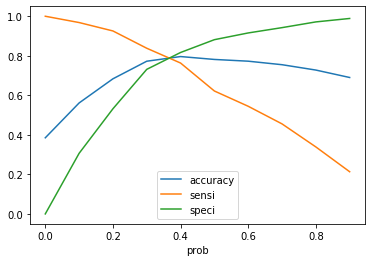

In [96]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

# From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [97]:
y_train_pred_final['final_Converted'] = y_train_pred_final.Prob_Score.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Prob_Score,Prospect ID,Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Converted
0,0,0.229675,3009,22.967457,1,1,1,0,0,0,0,0,0,0,0
1,0,0.031660,1012,3.166021,1,0,0,0,0,0,0,0,0,0,0
2,0,0.250359,9226,25.035935,1,1,1,0,0,0,0,0,0,0,0
3,1,0.857181,4750,85.718084,1,1,1,1,1,1,1,1,1,0,1
4,1,0.771044,7987,77.104428,1,1,1,1,1,1,1,1,0,0,1


In [98]:
# Checking overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Converted)

0.7724767753109747

In [99]:
#creating confusion matrix
confu2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Converted)
confu2

array([[2856, 1049],
       [ 396, 2050]])

In [100]:
TP = confu2[1,1] # true positive 
TN = confu2[0,0] # true negatives
FP = confu2[0,1] # false positives
FN = confu2[1,0] # false negatives

In [101]:
# Sensitivity for logistic regression model
TP / float(TP+FN)

0.8381030253475061

In [102]:
# Calculate specificity
TN / float(TN+FP)

0.731370038412292

# We have got a sensitivity of 83.1%

# Plotting ROC curve to check trade-off b/w Sensitivity and Specificity

In [103]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [104]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Prob_Score, drop_intermediate = False )

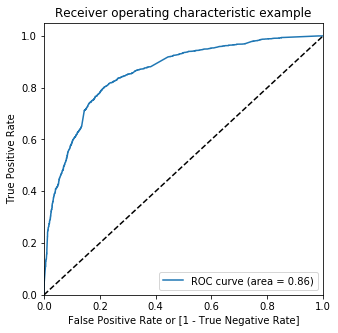

In [105]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Prob_Score)

In [151]:
#precision
precision=confu2[1,1]/(confu2[0,1]+confu2[1,1])

In [152]:
#recallll
recallll=confu2[1,1]/(confu2[1,0]+confu2[1,1])

In [153]:
#recallll
recallll=confu2[1,1]/(confu2[1,0]+confu2[1,1])

In [154]:
#Checking the F1 score(Score near to 1 is a good score)
2 * (precision * recallll) / (precision + recallll)

0.7165109034267912

### Making predictions on the test set

In [155]:
#Scaling the test data
X_test[['Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit']])

KeyError: "['Page Views Per Visit'] not in index"

In [156]:
X_test = X_test[colu]
X_test.head()

,Total Time Spent on Website,LeadOrigin_Landing Page Submission,LeadSource_Reference,LeadSource_Welingak Website,LastActivity_Email Bounced,LastActivity_Olark Chat Conversation,LastActivity_SMS Sent,LNA_Had a Phone Conversation,LNA_Modified
3271,-0.600595,0,0,0,0,0,0,0,0
1490,1.887326,1,0,0,0,0,0,0,0
7936,-0.752879,0,0,0,0,0,0,0,0
4216,-0.888650,0,1,0,0,0,0,0,1
3830,-0.587751,1,0,0,0,0,0,0,0


In [157]:
#adding constant
X_test_sm = sm.add_constant(X_test)

In [158]:
#making prediction on test set
y_test_pred = res.predict(X_test_sm)

In [159]:
#making prediction on test set
y_test_pred = res.predict(X_test_sm)

In [160]:
y_test_pred[:10]

3271    0.268247
1490    0.706884
7936    0.238848
4216    0.781120
3830    0.161570
1800    0.140465
6507    0.365574
4821    0.337088
4223    0.967488
4714    0.250359
dtype: float64

In [161]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [162]:
# head
y_pred_1.head()

,0
3271,0.268247
1490,0.706884
7936,0.238848
4216,0.781120
3830,0.161570


In [163]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [164]:
# Putting ProspectID to index
y_test_df['Prospect ID'] = y_test_df.index

In [165]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [166]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [167]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.268247
1,1,1490,0.706884
2,0,7936,0.238848
3,1,4216,0.781120
4,0,3830,0.161570


In [168]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Prob_Score'})

In [169]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,Prob_Score
0,0,3271,0.268247
1,1,1490,0.706884
2,0,7936,0.238848
3,1,4216,0.781120
4,0,3830,0.161570


In [170]:
y_pred_final['final_Converted'] = y_pred_final.Prob_Score.map(lambda x: 1 if x > 0.3 else 0)

In [171]:
y_pred_final.head()

,Converted,Prospect ID,Prob_Score,final_Converted
0,0,3271,0.268247,0
1,1,1490,0.706884,1
2,0,7936,0.238848,0
3,1,4216,0.781120,1
4,0,3830,0.161570,0


In [172]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Converted)

0.7660668380462725

In [173]:
confu2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Converted)
confu2

array([[1281,  453],
       [ 184,  805]])

In [174]:
TP = confu2[1,1] # true positive 
TN = confu2[0,0] # true negatives
FP = confu2[0,1] # false positives
FN = confu2[1,0] # false negatives

In [175]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.813953488372093

In [176]:
# Let us calculate specificity
TN / float(TN+FP)

0.7387543252595156

In [177]:
#checking ROC curve for test data
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [178]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Prob_Score, drop_intermediate = False )

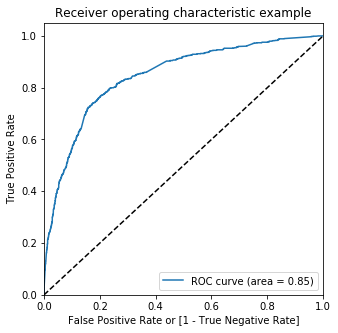

In [179]:
draw_roc(y_pred_final.Converted, y_pred_final.Prob_Score)

In [180]:
#creating confusion matrix
confu = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Converted)
confu

array([[1281,  453],
       [ 184,  805]])

In [181]:
#precision
precision1=confu[1,1]/(confu[0,1]+confu[1,1])

In [184]:
#recall
recallll=confu2[1,1]/(confu2[1,0]+confu2[1,1])
recallll

0.813953488372093

In [186]:
#Checking the F1 score(Score near to 1 is a good score)
2 * (precision1 * recallll) / (precision1 + recallll)

0.7165109034267912

### For test dataset we got the sensitivty(Recall) as 80.9% 